# Imputación de datos con pandas

## Programación para Análisis de datos

### Mtra. Gisel Hernández Chávez

Ejemplos tomados de la documentación de pandas:

https://pandas.pydata.org/docs/user_guide/missing_data.html 

## Introducción

Para lidiar con datos faltantes debemos hacer primero un análisis que concluye en la decisión de eliminar los faltantes quitando filas o columnas (en pandas se hace con dropna() ) o imputando con valores.

Si bien NaN es el marcador de valor faltante predeterminado por razones de conveniencia y velocidad computacional, debemos poder detectar fácilmente este valor con datos de diferentes tipos: punto flotante, entero, booleano y objeto general. En muchos casos, sin embargo, surgirá Python "None" y también deseamos considerar otras cadenas como "falta", "no disponible" o "NA".

Si tiene en sus datos valores inf o -inf y los quiere considerar faltantes, puede escribir el siguiente código:

    pandas.options.mode.use_inf_as_na = True
    
Para facilitar la detección de valores faltantes (y en diferentes tipos de arreglos), pandas proporciona las funciones isna() y notna(), que también son métodos en objetos Series y DataFrame.

Uno tiene que tener en cuenta que en Python (y NumPy), los nan no se comparan por igual, pero los None sí. Tenga en cuenta que pandas/NumPy usa el hecho de que np.nan != np.nan, y trata a None como np.nan.

Debido a que NaN es un flotante, una columna de enteros con incluso un valor faltante se convierte en dtype de coma flotante. pandas proporciona un arreglo de enteros anulables, que se puede usar solicitando explícitamente el dtype

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
a = pd.Series([1, 2, np.nan, 4])
a

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [4]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

### Nulos para tipo datetime

Para los tipos datetime64[ns], __NaT__ representa los valores faltantes. Este es un valor centinela pseudo-nativo que puede ser representado por NumPy en un dtype singular (datetime64[ns]). Los objetos pandas proporcionan compatibilidad entre NaT y NaN.

### Cálculos con valores faltantes

Los valores faltantes se propagan naturalmente a través de operaciones aritméticas entre objetos pandas.

Las estadísticas descriptivas calculadas con las funciones mistas de pandas y numpy (mean(9, std(),describe(), etc.), al sumar datos, tratan como = a los valores NA (faltantes).

+ Si todos los datos son NA, el resultado será 0.

+ Los métodos acumulativos como cumsum() y cumprod() ignoran los valores NA de forma predeterminada, pero los conservan en los arreglos resultantes. Para anular este comportamiento e incluir valores NA, use skipna=False.

#### Ejercicio de ejemplo

In [85]:
np.random.seed(44)

In [86]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

df["four"] = "bar"
df["five"] = df["one"] > 0
df


,one,two,three,four,five
a,-0.750615,1.316357,1.246140,bar,False
c,-1.604916,-1.468144,-1.715070,bar,False
e,1.858784,0.087588,-0.052322,bar,True
f,0.555472,-0.963404,-0.180321,bar,True
h,-1.183409,0.605446,-0.951651,bar,False


In [87]:
# Nuevo DataFrame con datos faltantes
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])
df2

,one,two,three,four,five
a,-0.750615,1.316357,1.246140,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-1.604916,-1.468144,-1.715070,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.858784,0.087588,-0.052322,bar,True
f,0.555472,-0.963404,-0.180321,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-1.183409,0.605446,-0.951651,bar,False


In [88]:
pd.isna(df2["one"])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [89]:
df2["four"].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [9]:
df2["one"] == np.nan  # np.nan == np.nan se evalúa False

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

In [10]:
df3 = df.copy()

df3["timestamp"] = pd.Timestamp("20120101")

df3

,one,two,three,four,five,timestamp
a,1.494947,-1.632553,-0.158481,bar,True,2012-01-01
c,-1.168706,-0.680119,1.824484,bar,False,2012-01-01
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,0.200196,-2.071867,0.524614,bar,True,2012-01-01


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to h
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   one        5 non-null      float64       
 1   two        5 non-null      float64       
 2   three      5 non-null      float64       
 3   four       5 non-null      object        
 4   five       5 non-null      bool          
 5   timestamp  5 non-null      datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), object(1)
memory usage: 417.0+ bytes


In [12]:
# Localiza las filas a,c,h y modifica los valores existentes con valores nulos
df3.loc[["a", "c", "h"], ["one", "timestamp"]] = np.nan

df3

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,NaN,-2.071867,0.524614,bar,True,NaT


In [13]:
df3.dtypes.value_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

In [14]:
a = df[['one','two']]
a

,one,two
a,1.494947,-1.632553
c,-1.168706,-0.680119
e,-0.075270,-0.964457
f,-0.455897,-0.868865
h,0.200196,-2.071867


In [15]:
b = df[['one','two','three']]
b

,one,two,three
a,1.494947,-1.632553,-0.158481
c,-1.168706,-0.680119,1.824484
e,-0.075270,-0.964457,1.236147
f,-0.455897,-0.868865,-1.120351
h,0.200196,-2.071867,0.524614


In [16]:
a + b  # note que la columna three contendrán NaN

,one,three,two
a,2.989895,NaN,-3.265107
c,-2.337413,NaN,-1.360238
e,-0.150539,NaN,-1.928915
f,-0.911795,NaN,-1.737731
h,0.400392,NaN,-4.143735


In [17]:
df3

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,NaN,-2.071867,0.524614,bar,True,NaT


In [18]:
df3["one"].sum()  # Los NaN los toma como =

-0.5311669593456366

In [19]:
df3.mean()   #Media por columnas, tomando los NaN como 0


C:\Users\david\AppData\Local\Temp\ipykernel_8684\3449926829.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3.mean()   #Media por columnas, tomando los NaN como 0
C:\Users\david\AppData\Local\Temp\ipykernel_8684\3449926829.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.mean()   #Media por columnas, tomando los NaN como 0


one     -0.265583
two     -1.243572
three    0.461283
five     0.400000
dtype: float64

In [20]:
df3.mean(1)

C:\Users\david\AppData\Local\Temp\ipykernel_8684\3508653484.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3.mean(1)
C:\Users\david\AppData\Local\Temp\ipykernel_8684\3508653484.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean(1)


a   -0.263678
c    0.381455
e    0.049105
f   -0.611278
h   -0.182418
dtype: float64

In [21]:
df3.cumsum()

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,1,NaT
c,NaN,-2.312672,1.666003,barbar,1,NaT
e,-0.075270,-3.277130,2.902150,barbarbar,1,2012-01-01
f,-0.531167,-4.145995,1.781799,barbarbarbar,1,2053-12-31
h,NaN,-6.217862,2.306414,barbarbarbarbar,2,NaT


In [22]:
df3.cumsum(skipna=False)

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,1,NaT
c,NaN,-2.312672,1.666003,barbar,1,1970-01-01 00:00:00.000000000
e,NaN,-3.277130,2.902150,barbarbar,1,2012-01-01 00:00:00.000000000
f,NaN,-4.145995,1.781799,barbarbarbar,1,2053-12-31 00:00:00.000000000
h,NaN,-6.217862,2.306414,barbarbarbarbar,2,1761-09-21 00:12:43.145224192


### Algunas reglas de sumas y productos con NaN

+ La suma de una serie o columna vacía o totalmente NA de un DataFrame es 0.
+ El producto de una serie o columna vacía o totalmente NA de un DataFrames es 1.
+ Los grupos NA en GroupBy se excluyen automáticamente. Este comportamiento es consistente con R.

In [23]:
pd.Series([np.nan]).sum()
Out[36]: 0.0

pd.Series([], dtype="float64").sum()

0.0

0.0

In [24]:
pd.Series([np.nan]).sum()

pd.Series([], dtype="float64").sum()

0.0

0.0

In [25]:
pd.Series([np.nan]).prod()

pd.Series([], dtype="float64").prod()

1.0

1.0

In [26]:
df3

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,NaN,-2.071867,0.524614,bar,True,NaT


In [27]:
df3.groupby("one").mean() #Los grupos NA en GroupBy se excluyen automáticamente

C:\Users\david\AppData\Local\Temp\ipykernel_8684\4199796745.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby("one").mean() #Los grupos NA en GroupBy se excluyen automáticamente


,two,three,five
one,,,
-0.455897,-0.868865,-1.120351,0.0
-0.075270,-0.964457,1.236147,0.0


## Métodos para limpiar o rellenar valores NaN en pandas

fillna() puede "rellenar" valores NA con datos que no son NA de varias maneras

df.fillna(
    value: 'Hashable | Mapping | Series | DataFrame' = None,
    *,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool' = False,
    limit: 'int | None' = None,
    downcast: 'dict | None' = None,
) -> 'DataFrame | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values. For `Series`
    this parameter is unused and defaults to 0.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any
    other views on this object (e.g., a no-copy slice for a column in a
    DataFrame).
limit : int, default None
    If method is specified, this is the maximum number of consecutive
    NaN values to forward/backward fill. In other words, if there is
    a gap with more than this number of consecutive NaNs, it will only
    be partially filled. If method is not specified, this is the
    maximum number of entries along the entire axis where NaNs will be
    filled. Must be greater than 0 if not None.
downcast : dict, default is None
    A dict of item->dtype of what to downcast if possible,
    or the string 'infer' which will try to downcast to an appropriate
    equal type (e.g. float64 to int64 if possible).

Returns
-------
DataFrame or None
    Object with missing values filled or None if ``inplace=True``.

See Also
--------
interpolate : Fill NaN values using interpolation.
reindex : Conform object to new index.
asfreq : Convert TimeSeries to specified frequency.

In [28]:
#df.fillna?

In [29]:
df2

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-1.168706,-0.680119,1.824484,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.200196,-2.071867,0.524614,bar,True


In [30]:
 df2.fillna(0)  # No es inplace

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,0.000000,0.000000,0.000000,0,0
c,-1.168706,-0.680119,1.824484,bar,False
d,0.000000,0.000000,0.000000,0,0
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,0.000000,0.000000,0.000000,0,0
h,0.200196,-2.071867,0.524614,bar,True


In [31]:
df2["one"].fillna("missing")  # No es inplace

a    1.494947
b     missing
c   -1.168706
d     missing
e    -0.07527
f   -0.455897
g     missing
h    0.200196
Name: one, dtype: object

In [32]:
df2  # Note que no se hicieron los cambios; eran solo vistas

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-1.168706,-0.680119,1.824484,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.200196,-2.071867,0.524614,bar,True


### Llenar los vacíos hacia adelante (foreward) o hacia atrás (backward)

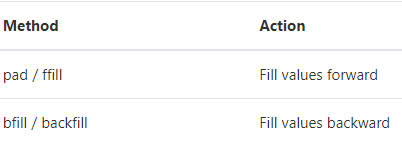


In [33]:
df2.fillna(method="pad")  # rellena hacia adelante

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,1.494947,-1.632553,-0.158481,bar,True
c,-1.168706,-0.680119,1.824484,bar,False
d,-1.168706,-0.680119,1.824484,bar,False
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,-0.455897,-0.868865,-1.120351,bar,False
h,0.200196,-2.071867,0.524614,bar,True


In [34]:
df3

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,NaN,-2.071867,0.524614,bar,True,NaT


In [35]:
df3.fillna(method="pad")

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,-0.455897,-2.071867,0.524614,bar,True,2012-01-01


### Limitar la cantidad de llenado

Si solo queremos que los vacíos consecutivos se llenen hasta un cierto número de puntos de datos, podemos usar la palabra clave _limit_

In [36]:
# Nuevo DataFrame con datos faltantes
df4 = df.reindex(["a", "b", "c", "ch","d", "e", "f", "g", "h"])
df4


,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-1.168706,-0.680119,1.824484,bar,False
ch,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,0.200196,-2.071867,0.524614,bar,True


In [37]:
df4.fillna(method="pad", limit=1)

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,1.494947,-1.632553,-0.158481,bar,True
c,-1.168706,-0.680119,1.824484,bar,False
ch,-1.168706,-0.680119,1.824484,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,-0.455897,-0.868865,-1.120351,bar,False
h,0.200196,-2.071867,0.524614,bar,True


In [38]:
df4.fillna(method="bfill", limit=1)

,one,two,three,four,five
a,1.494947,-1.632553,-0.158481,bar,True
b,-1.168706,-0.680119,1.824484,bar,False
c,-1.168706,-0.680119,1.824484,bar,False
ch,NaN,NaN,NaN,NaN,NaN
d,-0.075270,-0.964457,1.236147,bar,False
e,-0.075270,-0.964457,1.236147,bar,False
f,-0.455897,-0.868865,-1.120351,bar,False
g,0.200196,-2.071867,0.524614,bar,True
h,0.200196,-2.071867,0.524614,bar,True


### Llenado con un objeto de pandas

También puede rellenar utilizando un dict o una serie que esté alineable. Las etiquetas del dict o índice de la serie deben coincidir con las columnas del DataFrame que desea llenar. El caso de uso que se verá a continuación es llenar un DataFrame con la media de esa columna.

In [39]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,1.674678,-1.493660,0.323566
1,0.480857,-1.482030,-0.583848
2,0.490520,2.088525,-1.057988
3,NaN,1.137039,0.373891
4,NaN,NaN,-1.219887
5,-1.471265,NaN,NaN
6,2.160844,0.221033,NaN
7,0.706226,1.320778,NaN
8,-0.378279,1.281943,0.460978
9,-0.233354,-0.087748,-0.023472


In [40]:
dff.fillna(dff.mean())

,A,B,C
0,1.674678,-1.493660,0.323566
1,0.480857,-1.482030,-0.583848
2,0.490520,2.088525,-1.057988
3,0.428778,1.137039,0.373891
4,0.428778,0.373235,-1.219887
5,-1.471265,0.373235,-0.246680
6,2.160844,0.221033,-0.246680
7,0.706226,1.320778,-0.246680
8,-0.378279,1.281943,0.460978
9,-0.233354,-0.087748,-0.023472


In [41]:
dff.fillna(dff.mean()["B":"C"])

,A,B,C
0,1.674678,-1.493660,0.323566
1,0.480857,-1.482030,-0.583848
2,0.490520,2.088525,-1.057988
3,NaN,1.137039,0.373891
4,NaN,0.373235,-1.219887
5,-1.471265,0.373235,-0.246680
6,2.160844,0.221033,-0.246680
7,0.706226,1.320778,-0.246680
8,-0.378279,1.281943,0.460978
9,-0.233354,-0.087748,-0.023472


In [42]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")  # Reemplaza valores cuando la condición es False

,A,B,C
0,1.674678,-1.493660,0.323566
1,0.480857,-1.482030,-0.583848
2,0.490520,2.088525,-1.057988
3,0.428778,1.137039,0.373891
4,0.428778,0.373235,-1.219887
5,-1.471265,0.373235,-0.246680
6,2.160844,0.221033,-0.246680
7,0.706226,1.320778,-0.246680
8,-0.378279,1.281943,0.460978
9,-0.233354,-0.087748,-0.023472


In [43]:
dff.where?

Signature:
dff.where(
    cond,
    other=<no_default>,
    *,
    inplace: 'bool' = False,
    axis: 'Axis | None' = None,
    level: 'Level' = None,
    errors: 'IgnoreRaise | lib.NoDefault' = 'raise',
    try_cast: 'bool | lib.NoDefault' = <no_default>,
) -> 'DataFrame | None'
Docstring:
Replace values where the condition is False.

Parameters
----------
cond : bool Series/DataFrame, array-like, or callable
    Where `cond` is True, keep the original value. Where
    False, replace with corresponding value from `other`.
    If `cond` is callable, it is computed on the Series/DataFrame and
    should return boolean Series/DataFrame or array. The callable must
    not change input Series/DataFrame (though pandas doesn't check it).
other : scalar, Series/DataFrame, or callable
    Entries where `cond` is False are replaced with
    corresponding value from `other`.
    If other is callable, it is computed on the Series/DataFrame and
    should return scalar or Series/DataFrame. The cal

### Eliminando etiquetas del eje con datos faltantes: Dropna

Es posible que desee simplemente excluir las etiquetas de un conjunto de datos que se refiere a los datos faltantes. Para hacer esto, use dropna ()

In [44]:
df3

,one,two,three,four,five,timestamp
a,NaN,-1.632553,-0.158481,bar,True,NaT
c,NaN,-0.680119,1.824484,bar,False,NaT
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01
h,NaN,-2.071867,0.524614,bar,True,NaT


In [45]:
df3.dropna(axis=0)

,one,two,three,four,five,timestamp
e,-0.075270,-0.964457,1.236147,bar,False,2012-01-01
f,-0.455897,-0.868865,-1.120351,bar,False,2012-01-01


In [46]:
df3.dropna(axis=1)

,two,three,four,five
a,-1.632553,-0.158481,bar,True
c,-0.680119,1.824484,bar,False
e,-0.964457,1.236147,bar,False
f,-0.868865,-1.120351,bar,False
h,-2.071867,0.524614,bar,True


In [47]:
df3["one"].dropna()

e   -0.075270
f   -0.455897
Name: one, dtype: float64

### Interpolación

Tanto los objetos de serie como DataFrame tienen el método interpolate() que, por defecto, realiza la interpolación lineal en los puntos de datos faltantes.

In [48]:
time_index = pd.date_range("1/01/2021", periods=10, freq="W")

ts = pd.DataFrame(index=time_index);
ts

""
2021-01-03
2021-01-10
2021-01-17
2021-01-24
2021-01-31
2021-02-07
2021-02-14
2021-02-21
2021-02-28
2021-03-07


In [49]:
# Agregar columna con datos faltantes
ts["Sales"] = [5.0,4.0,np.nan,np.nan,1.0,np.nan,5.0,3.5,2.0,1.0];
ts

,Sales
2021-01-03,5.0
2021-01-10,4.0
2021-01-17,NaN
2021-01-24,NaN
2021-01-31,1.0
2021-02-07,NaN
2021-02-14,5.0
2021-02-21,3.5
2021-02-28,2.0
2021-03-07,1.0


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

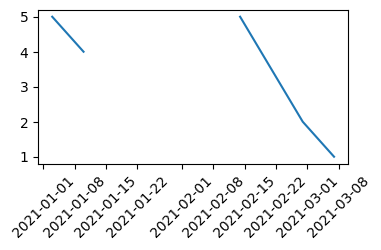

In [50]:
fig,ax = plt.subplots(figsize=(4,2))
plt.xticks(rotation=45)
plt.plot(ts["Sales"])

In [51]:
#ts.interpolate?

In [52]:
ts2 = ts.interpolate() # Por defecto usa interpolación lineal, pero se pueden emplear otros métodos
ts2

,Sales
2021-01-03,5.0
2021-01-10,4.0
2021-01-17,3.0
2021-01-24,2.0
2021-01-31,1.0
2021-02-07,3.0
2021-02-14,5.0
2021-02-21,3.5
2021-02-28,2.0
2021-03-07,1.0


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

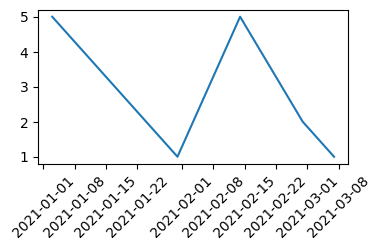

In [53]:
fig,ax = plt.subplots(figsize=(4,2))
plt.xticks(rotation=45)
plt.plot(ts2["Sales"])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

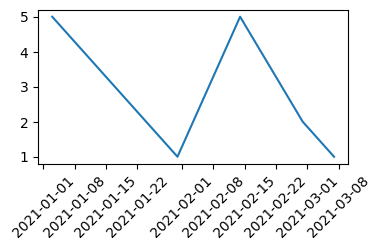

In [54]:
fig,ax = plt.subplots(figsize=(4,2))
plt.xticks(rotation=45)
plt.plot(ts["Sales"].interpolate(method="values"))


In [55]:
# Se puede interpolar un DataFrame completo

df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)


df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [56]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


### Métodos de interpolación

El argumento _method_ da acceso a los métodos de interpolación más elegantes. Si tiene SCIPY instalado, puede pasar el nombre de una rutina de interpolación 1-D al método. Deberá consultar la documentación completa de la interpolación y la guía de referencia en scipy para más detalles. El método de interpolación apropiado dependerá del tipo de datos con los que esté trabajando.

+ Si está tratando con una serie temporal que está creciendo a una velocidad cada vez mayor, el método = 'cuadratic' puede ser apropiado.

+ Si tiene valores que se aproximan a una función de distribución acumulativa, entonces el método = 'pchip' debería funcionar bien.

+ Para llenar los valores faltantes con el objetivo de trazado suave, considere el método = 'akima'.

In [57]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [58]:
df.interpolate(method="barycentric")

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [59]:
df.interpolate(method="pchip")

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [60]:
df.interpolate(method="akima")

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [61]:
df.interpolate(method="spline", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [62]:
df.interpolate(method="polynomial", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


<AxesSubplot: >

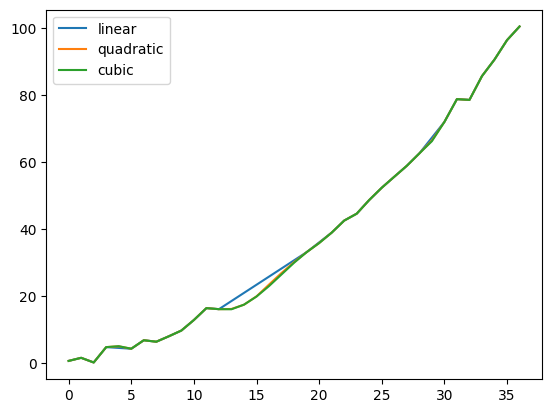

In [63]:
# Comparación de métodos

np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ["linear", "quadratic", "cubic"]

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

df.plot()

### Otro caso de uso es la interpolación a nuevos valores

Supongamos que tiene 100 observaciones de alguna distribución. Y supongamos que está particularmente interesado en lo que está sucediendo en el medio. Puede mezclar los métodos de reindex() e interpolate() de Pandas para interpolar en los nuevos valores.

In [64]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))

ser

0     0.010250
1     0.013017
2     0.025551
3     0.027202
4     0.041798
        ...   
95    0.970580
96    0.972911
97    0.983153
98    0.988510
99    0.993852
Length: 100, dtype: float64

In [65]:
ser[49:51]

49    0.471410
50    0.489266
dtype: float64

In [66]:
# interpolar en new_index
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))

interp_s = ser.reindex(new_index).interpolate(method="pchip")

interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

### Límites de interpolación

Al igual que otros métodos de relleno de pandas, interpolat () acepta un argumento de palabras clave _limit_. Use este argumento para limitar el número de valores NAN consecutivos llenados desde la última observación válida

In [67]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])

ser

# Rellena todos los valores consecutivos hacia adelante
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [68]:
# fill one consecutive value in a forward direction
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

Por defecto, los valores de NAN se completan en una dirección de avance (foreward). Use el parámetro limit_direction para llenar hacia atrás o desde ambas direcciones.

In [69]:
# rellena un valor consecutivo hacia atrás
ser.interpolate(limit=1, limit_direction="backward")

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [70]:
# rellena un valor consecutivo en ambas direcciones
ser.interpolate(limit=1, limit_direction="both")

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

In [71]:
# rellena todos los valores consecutivos en ambas direcciones
ser.interpolate(limit_direction="both")

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

Por defecto, los valores de NAN se llenan si están dentro (rodeados por) valores válidos existentes, o fuera de los valores válidos existentes. El parámetro limit_area restringe el llenado a valores dentro o externos.

In [72]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [73]:
# Llena un valor interno consecutivo en ambas direcciones
ser.interpolate(limit_direction="both", limit_area="inside", limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [74]:
# llena todos los valores consecutivos externos hacia atrás
ser.interpolate(limit_direction="backward", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [75]:
# llena todos los valores consecutivos externos en ambas direcciones
ser.interpolate(limit_direction="both", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

### Reemplazo de valores genéricos

Muchas veces queremos reemplazar los valores arbitrarios con otros valores.

replace() en serie y replace() en DataFrame proporcionan una forma eficiente y flexible de realizar tales reemplazos.

Para una serie, puede reemplazar un valor único o una lista de valores por otro valor.

In [76]:
ser2 = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

ser2.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [77]:
# reemplazar una lista de valores con otra lista
ser2.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [78]:
# especificando un dict para el mapeo
ser2.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [79]:
# En un DataFrame se pueden especificar valores individuales por columnas
df6 = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})

df6.replace({"a": 0, "b": 5}, 100) # 0 de la columna a y 5 de la columna b, se reemplazan por 100

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [80]:
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [81]:
#
ser.replace([5.0], method="pad")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

## Reemplazo de cadenas y expresiones regulares

Nota recordatoria:

    Las cadenas de Python prefijadas con el carcter r como r'Hello World 'son las llamadas cadenas "crudas" (se usa r porque en inglés es raw). 

    Estas cadenas tienen una semántica diferente con respecto a las barras invertidas que las cadenas sin este prefijo. 

    Las barras invertidas en las cadenas crudas se interpretarán como una barra invertida escapada, por ejemplo, r '\' == '\\'. 
    
A continuación veremos ejemplos de reemplazo de cadenas

In [82]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df7 = pd.DataFrame(d)
df7

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [83]:
df7.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [84]:
# mismo reemplazo anterior, pero con una expresión regular
df7.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d
